# Exploratory Data Analysis: Automobile Dataset
### Introduction
This analysis explores an automobile dataset containing vehicle characteristics such as price, make, body style, engine size, and fuel efficiency. The goal is to identify patterns that influence pricing and performance, and to extract insights that could support business or market-level decisions.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the movies dataset 
automobile_df = pd.read_csv('Automobile_data.csv',delimiter = ',', skipinitialspace=True)

### Data Cleansing
#### To ensure accurate and reliable analysis, the dataset was cleaned and prepared by addressing redundancy, missing values, and data types.

In [3]:
columns_to_remove = ['symboling', 'normalized-losses', 'engine-location', 'bore', 'stroke', 'compression-ratio', 'peak-rpm']

automobile_df = automobile_df.drop(columns=columns_to_remove)

automobile_df = automobile_df.drop_duplicates()

automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.replace('l', np.nan)
automobile_df = automobile_df.dropna()

automobile_df['price'] = automobile_df['price'].astype(np.int64)

## Exploratory Analysis
### Price Analysis: Most and Least Expensive Vehicles

This analysis explores the factors driving vehicle pricing. By comparing the most and least expensive vehicles, we can observe patterns in horsepower, fuel efficiency, and other key attributes that influence price.

In [ ]:
most_expensive_automobiles = automobile_df.sort_values(by='price', ascending=False)
most_expensive_automobiles.head()


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
74,mercedes-benz,gas,std,two,hardtop,rwd,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,184,14,16,45400
16,bmw,gas,std,two,sedan,rwd,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,182,16,22,41315
73,mercedes-benz,gas,std,four,sedan,rwd,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,184,14,16,40960
128,porsche,gas,std,two,convertible,rwd,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,207,17,25,37028
17,bmw,gas,std,four,sedan,rwd,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,182,15,20,36880


In [5]:
cheapest_automobiles = automobile_df.sort_values(by='price', ascending=True)
cheapest_automobiles.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,city-mpg,highway-mpg,price
138,subaru,gas,std,two,hatchback,fwd,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,69,31,36,5118
50,mazda,gas,std,two,hatchback,fwd,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,68,30,31,5195
150,toyota,gas,std,two,hatchback,fwd,95.7,158.7,63.6,54.5,1985,ohc,four,92,2bbl,62,35,39,5348
76,mitsubishi,gas,std,two,hatchback,fwd,93.7,157.3,64.4,50.8,1918,ohc,four,92,2bbl,68,37,41,5389
32,honda,gas,std,two,hatchback,fwd,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,60,38,42,5399


Analysis of the most and least expensive vehicles shows that higher-priced cars tend to have significantly higher horsepower, while lower-priced cars generally offer better fuel efficiency, as indicated by higher city and highway MPG. This highlights the trade-off between performance and fuel economy in vehicle pricing.

Text(0, 0.5, 'Price')

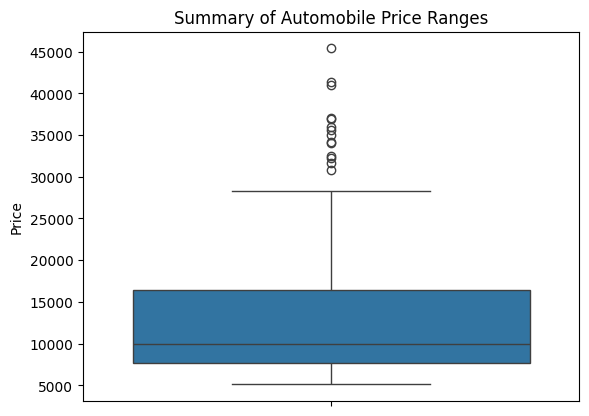

In [6]:
sns.boxplot(y='price', data=automobile_df)
plt.title('Summary of Automobile Price Ranges')
plt.ylabel('Price')

Most vehicles are priced between approximately 7,000 and 16,500, with a median around 10,000. A smaller number of high-priced outliers extend up to roughly 45,000.

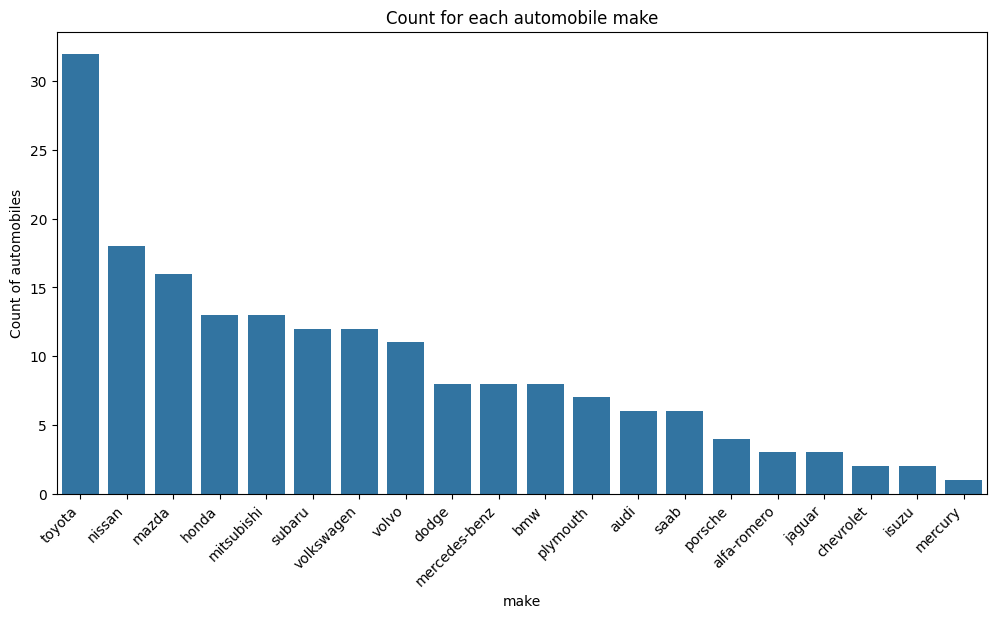

In [7]:
make_order = automobile_df['make'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(x='make', data=automobile_df, order=make_order)
plt.title('Count for each automobile make')
plt.xlabel('make')
plt.ylabel('Count of automobiles')
plt.xticks(rotation=45, ha='right');

Toyota is the most frequently represented manufacturer in the dataset, with over 30 entries. This strong presence may indicate a larger market footprint or wider model variety compared to other manufacturers. 

Text(0, 0.5, 'Highway MPG')

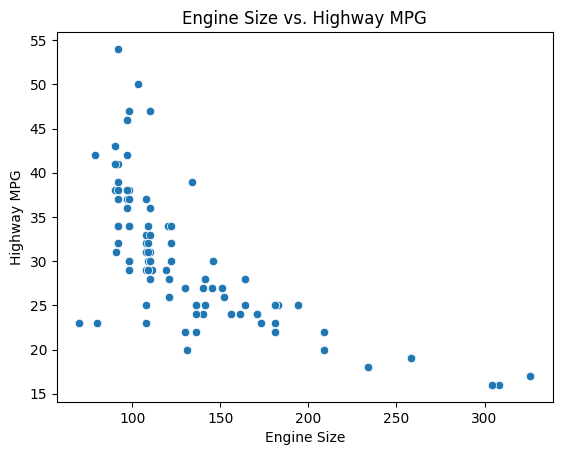

In [8]:
sns.scatterplot(x='engine-size', y='highway-mpg', data=automobile_df)
plt.title('Engine Size vs. Highway MPG')
plt.xlabel('Engine Size')
plt.ylabel('Highway MPG')

A clear negative relationship is observed between engine size and highway MPG, indicating that larger engines are generally associated with lower fuel efficiency.

body-style
sedan          85
hatchback      66
wagon          20
hardtop         8
convertible     6
Name: count, dtype: int64

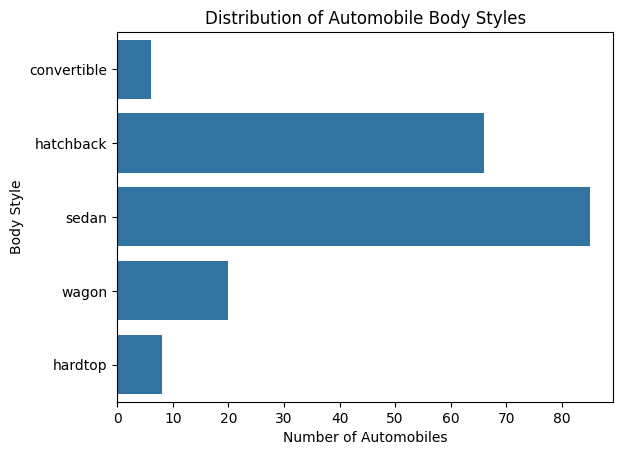

In [9]:
sns.countplot(y='body-style', data=automobile_df)
plt.title('Distribution of Automobile Body Styles')
plt.xlabel('Number of Automobiles')
plt.ylabel('Body Style')

body_style_counts = automobile_df['body-style'].value_counts()
body_style_counts

Hatchback and sedan body styles dominate the dataset, accounting for over 80% of all vehicles.

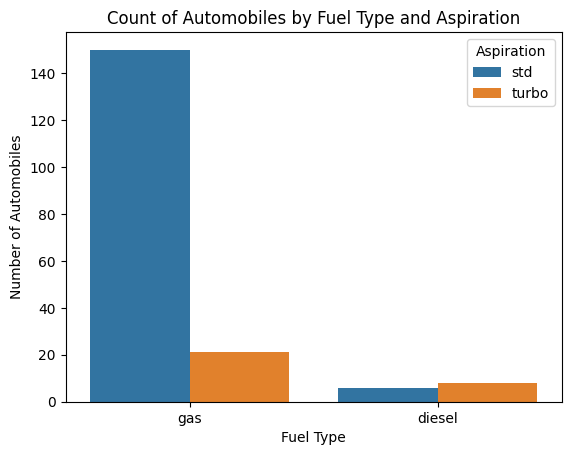

In [10]:
sns.countplot(x='fuel-type', hue='aspiration', data=automobile_df)
plt.title('Count of Automobiles by Fuel Type and Aspiration')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Automobiles')
plt.legend(title='Aspiration')

The majority of vehicles in the dataset use gasoline with standard aspiration.